# You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

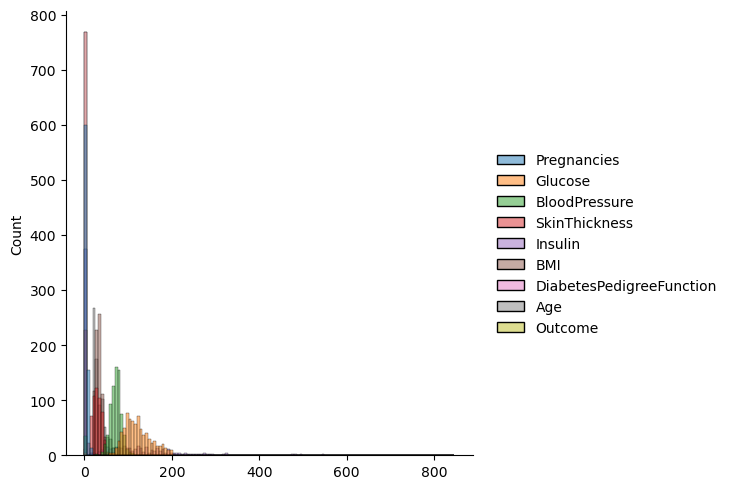

In [7]:
sns.displot(df)

<Axes: >

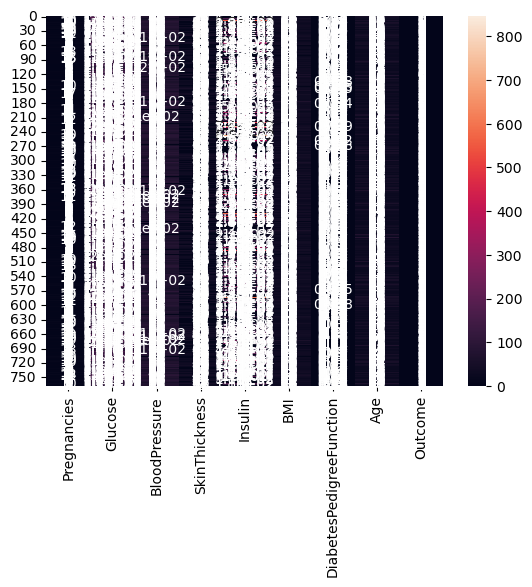

In [8]:
sns.heatmap(df,annot=True)

<Axes: ylabel='Count'>

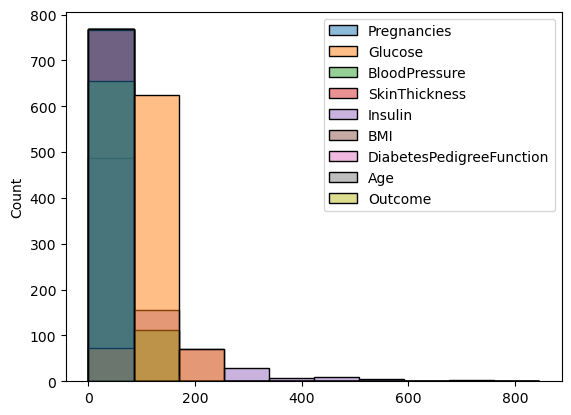

In [9]:
sns.histplot(df,bins=10)

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [12]:
X = df.iloc[:,:-1]

In [13]:
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [16]:
decision_class = DecisionTreeClassifier()

In [17]:
decision_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = decision_class.predict(X_test)

[Text(0.63564453125, 0.9705882352941176, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3650390625, 0.9117647058823529, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.2234375, 0.8529411764705882, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.128125, 0.7941176470588235, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.115625, 0.7352941176470589, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.103125, 0.6764705882352942, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.05, 0.6176470588235294, 'x[4] <= 156.0\ngini = 0.037\nsamples = 105\nvalue = [103, 2]'),
 Text(0.025, 0.5588235294117647, 'x[3] <= 41.0\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.0125, 0.5, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.0375, 0.5, 'x[3] <= 43.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.025, 0.4411764705882353, 'x[0] <= 1

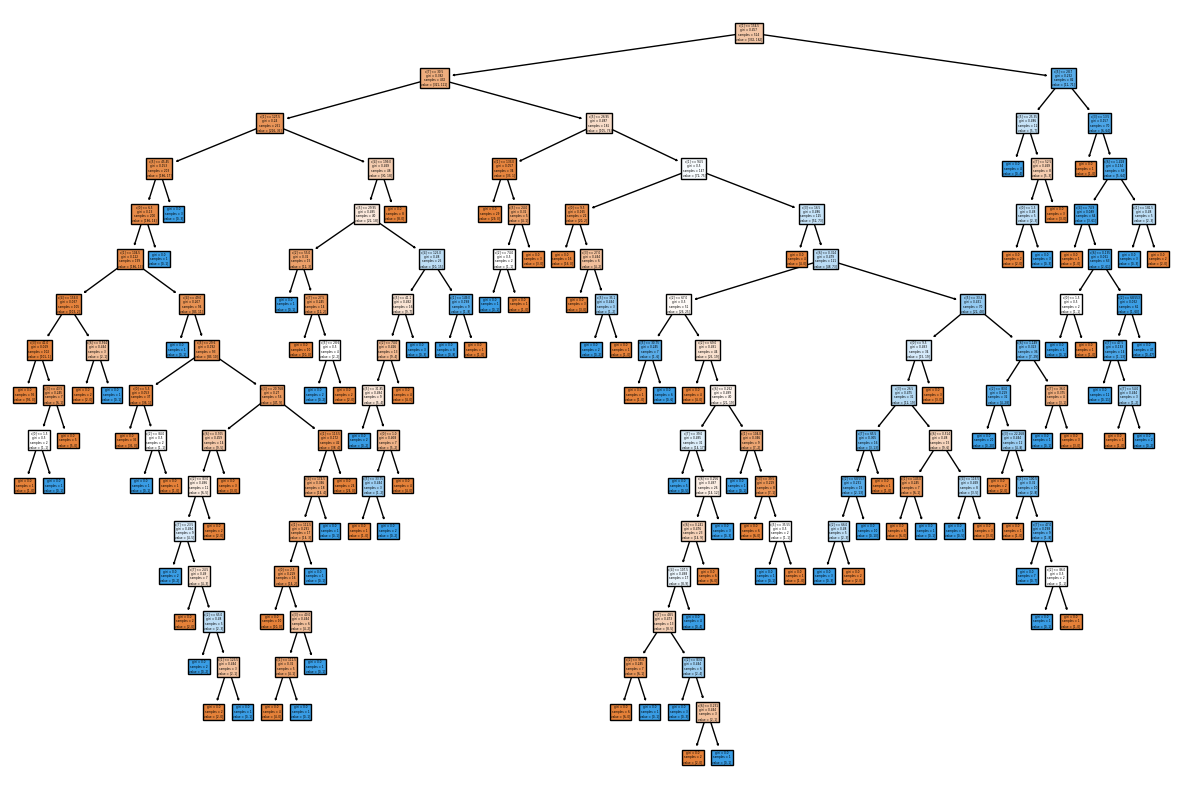

In [19]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_class,filled= True)

In [20]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
             'splitter': ['best', 'random'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,22,24,25,30,23,35],
             'max_features': ['auto', 'sqrt', 'log2']}

In [21]:
from sklearn.model_selection import GridSearchCV

In [33]:
clf = GridSearchCV(decision_class,param_grid= parameters,cv=5,scoring='accuracy')

In [34]:
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 20, 22, 24, 25, 30, 23, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 20, 22, 24, 25, 30, 23, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [37]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [38]:
y_pred = clf.predict(X_test)

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve

In [40]:
accuracy_score(y_pred,y_test)

0.7007874015748031

In [41]:
confusion_matrix(y_test,y_pred)

array([[137,  31],
       [ 45,  41]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       168
           1       0.57      0.48      0.52        86

    accuracy                           0.70       254
   macro avg       0.66      0.65      0.65       254
weighted avg       0.69      0.70      0.69       254



In [43]:
print(roc_curve(y_pred,y_test))

(array([0.        , 0.24725275, 1.        ]), array([0.        , 0.56944444, 1.        ]), array([2, 1, 0], dtype=int64))


# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [44]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [46]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='log2', splitter='random')

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [60]:
clf.predict([[0,137,40,35,168,43.1,2.28,33]])

array([1], dtype=int64)

In [61]:
clf.predict([[1,89,66,23,94,28,0.167,21]])

array([0], dtype=int64)